# QA6 Report - Diogo Paiva Almeida
<H2> Summary </H2> 

In this analysis, a **Principal Component Analysis (PCA)** was performed on the `BankData.txt` dataset, which contains eight variables related to personal financial and demographic information: Income, Education, Age, Residence, Employment, Savings, Debt, and Credit Cards.

The steps carried out were:

1. **Data Preparation:**  
   - The dataset was read into Python and standardized to have zero mean and unit variance to ensure all variables contribute equally to the analysis.

2. **Covariance Matrix and Eigen Decomposition:**  
   - The covariance matrix of the standardized data was computed, this shows how variables correlate with each other.
   - Eigenvalues and eigenvectors were calculated using `numpy.linalg` to identify the directions (principal components) that capture the most variance in the data.

3. **Principal Components Selection:**  
   - Principal components were selected based on their **explained variance** and **scree plot**, choosing those that collectively captures **84%** of the dataset’s information.

4. **Data Projection and Visualization:**  
   - The data was projected onto the selected principal components.  
   - A graphical representation (scatter plot) of the data in the new component space was created to explore patterns, clusters, and relationships between variables.

5. **Results Export:**  
   - Eigenvalues, eigenvectors, explained variance percentages, principal components, and transformed data are shown in this jupyter notebook.

In [1]:
## All imports needed for the code and report.
import numpy as np ## library for matrix operations
import pandas as pd ## library for data analysis
import matplotlib.pyplot as plt ## library for plotting graphics

In [2]:
## Reading dataset and inserting it into a numpy matrix
df = pd.read_csv("BankData.txt", header=0) ## header = 0, ignore headers
data = df.to_numpy()

In [3]:
print("Original dataset:\n")
print(data)

Original dataset:

[[50000    16    28     2     2  5000  1200     2]
 [72000    18    35    10     8 12000  5400     4]
 [61000    18    36     6     5 15000  1000     2]
 [88000    20    35     4     4   980  1100     4]
 [91100    18    38     8     9 20000     0     1]
 [45100    14    41    15    14  3900 22000     4]
 [36200    14    29     6     5   100  7000     5]
 [41000    12    34     9     8  5000   200     3]
 [40000    16    32     8     7 19000  1760     2]
 [32000    16    30     2     2 16000   550     1]
 [29000    16    28     1     4  2100  4600     2]
 [21240    12    26     2     2   100 10010     3]
 [58700    12    38     9     9  4500  7800     5]
 [41000    14    29     5     4   300 10000     6]
 [38720    16    36    11    11 24500   540     2]
 [88240    16    38    13    12 13600  8100     2]
 [40000    18    39     7     6 16000  1300     2]
 [34600    16    40    14    12 34000   100     3]
 [29800    12    27     1     3   100 10000     5]
 [56400    1

<h2>Step 1 -> standardize data (Xstd = (X - mean) / sigma)</h2>

In [4]:
mean = data.mean(axis = 0) ## calculating mean and storing it
sigma = data.std(axis=0)   ## calculating sigma and storing it

In [5]:
dataStd = (data - mean)/sigma ## standardize initial data and storing into dataStd

In [6]:
## Check if data is properly standardized (mean should be very close to 0)
print("Standardized Data Mean Matrix:\n")
print(dataStd.mean(axis=0))

Standardized Data Mean Matrix:

[-8.78926561e-18 -4.27435864e-16  6.47630098e-16 -6.66133815e-17
 -1.75785312e-17 -7.77156117e-17 -2.59052039e-17 -3.70074342e-17]


<h2>Step 2 ->Computing the Covariance Matrix (Cov = (1/(n-1))*Xstd^T * Xstd)

In [7]:
numSamples = data.shape[0] 
Cov = (dataStd.transpose() @ dataStd)/(numSamples-1)
print("Covariance Matrix:\n")
print(Cov)

Covariance Matrix:

[[ 1.03448276  0.56763574  0.53285345  0.35908935  0.3452809   0.21735034
  -0.20292861 -0.06066531]
 [ 0.56763574  1.03448276  0.23718309  0.11146322  0.05021052  0.46278529
  -0.47233096 -0.30639126]
 [ 0.53285345  0.23718309  1.03448276  0.86660565  0.87726283  0.57146891
   0.03350297 -0.13423239]
 [ 0.35908935  0.11146322  0.86660565  1.03448276  0.98505075  0.5897005
   0.19222262  0.05532577]
 [ 0.3452809   0.05021052  0.87726283  0.98505075  1.03448276  0.55737433
   0.25518484  0.02332084]
 [ 0.21735034  0.46278529  0.57146891  0.5897005   0.55737433  1.03448276
  -0.40603599 -0.42462051]
 [-0.20292861 -0.47233096  0.03350297  0.19222262  0.25518484 -0.40603599
   1.03448276  0.49067102]
 [-0.06066531 -0.30639126 -0.13423239  0.05532577  0.02332084 -0.42462051
   0.49067102  1.03448276]]


# Step 3 ->  Compute eigenvalues and eigenvectors
<H2>Eigenvalues measure how much variance each eigenvector captures, eigenvectors represent the new axes (directions of maximum variance).</H2>

In [8]:
eigenvalues, eigenvectors = np.linalg.eigh(Cov)
print("Eigenvalues:\n")
print(eigenvalues)

Eigenvalues:

[0.04256208 0.12967855 0.172229   0.42538205 0.54984027 1.08076068
 2.20551138 3.66989807]


# Step 4 -> Selecting the Top k Principal Components
To accomplish this we need to first reorder eigenvectors and eigenvalues to a descending order of variance

In [9]:
indices = np.argsort(-eigenvalues) ## save indices to reorder eigenvectors columns
print("Indices that will be used to reorder the eigenvalues:\n")
print(indices)

Indices that will be used to reorder the eigenvalues:

[7 6 5 4 3 2 1 0]


In [10]:
eigenvalues = np.flip(np.sort(eigenvalues)) ## sort in descending order
print("Ordered Eigenvalues:\n")
print(eigenvalues)

Ordered Eigenvalues:

[3.66989807 2.20551138 1.08076068 0.54984027 0.42538205 0.172229
 0.12967855 0.04256208]


In [11]:
ordered_eigenvectors = eigenvectors[:,indices] ## ordered columns (each column is a principal component)
print("Ordered Eigenvectors:\n")
print(ordered_eigenvectors)

Ordered Eigenvectors:

[[-0.31390136 -0.14464478 -0.67586006  0.34694884 -0.24134086  0.49387841
  -0.01774284  0.03012301]
 [-0.23696085 -0.44410209 -0.40086662 -0.23983661  0.62218299 -0.35695012
  -0.10308214 -0.05706354]
 [-0.48396049  0.13509566 -0.0041369   0.21151885 -0.1749525  -0.48732954
   0.65725501  0.05187928]
 [-0.46639233  0.27658632  0.09066078 -0.11572183 -0.03528727 -0.08519968
  -0.4872892   0.66212713]
 [-0.45892284  0.304457    0.1217504   0.01705887 -0.01437731 -0.02308044
  -0.36786557 -0.7385913 ]
 [-0.40406743 -0.21893973  0.36648477 -0.43575313  0.14314247  0.56809368
   0.34796989  0.01731438]
 [ 0.06722312  0.58505463 -0.07800916  0.28096218  0.68126042  0.24533067
   0.19568741  0.07463574]
 [ 0.1231922   0.4518659  -0.46804162 -0.703464   -0.19487715 -0.02171165
   0.15786914 -0.05783743]]


In [12]:
## to actually choose the top k components there's some ways we can accomplish this:
## 1. Explained variance, choosing k components that explain ~90% variance
explained_variance = eigenvalues / eigenvalues.sum()
print("Explained Variance of each component:\n")
print(explained_variance)

Explained Variance of each component:

[0.44344602 0.26649929 0.13059192 0.06643903 0.05140033 0.020811
 0.01566949 0.00514292]


The first component represents 44% of variance, the 2nd represents 26%, the third one 13%, our variance threshold is 90% so the first k components that cumulatively represent atleast 80% of variance will be chosen as our PC's.


In [13]:
cumulative = explained_variance.cumsum()
print("Cumulative Explained Variance:\n")
print(cumulative)

Cumulative Explained Variance:

[0.44344602 0.70994531 0.84053722 0.90697626 0.95837659 0.97918759
 0.99485708 1.        ]


The first 3 components represent ~84% of variance so these are likely to be the chosen 3 principal components.

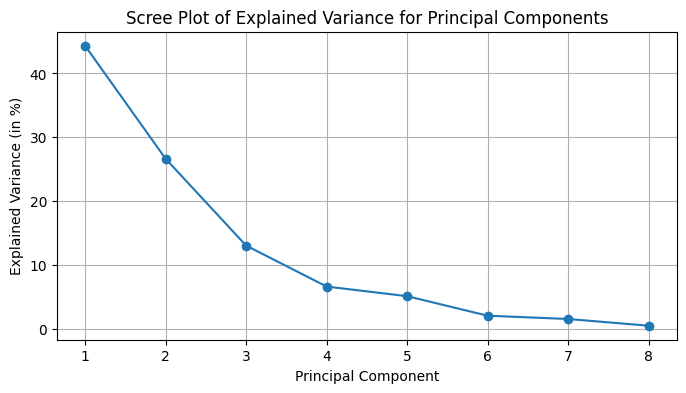

In [14]:
## 2. Scree plot, finding the elbow.
plt.figure(figsize=(8,4))
plt.plot(range(1, len(explained_variance) + 1), # x-axis
         explained_variance*100, ## convert explained variance in percentage
         marker='o', ## add a marker at each value
        )

plt.grid(True) ## squared grid, True makes it appear, False disappear
plt.title('Scree Plot of Explained Variance for Principal Components') ## Title on top
plt.xlabel('Principal Component') ## label for x-axis
plt.ylabel('Explained Variance (in %)') ## label for y-axis

plt.show()

The elbow is between components 3 and 4, therefore I'll choose k = 3, as it is easily representable on a 3D graphic.

In [15]:
top_components = ordered_eigenvectors[:, :3] ## creating the projection matrix of the top 4 principal components
print(top_components)

[[-0.31390136 -0.14464478 -0.67586006]
 [-0.23696085 -0.44410209 -0.40086662]
 [-0.48396049  0.13509566 -0.0041369 ]
 [-0.46639233  0.27658632  0.09066078]
 [-0.45892284  0.304457    0.1217504 ]
 [-0.40406743 -0.21893973  0.36648477]
 [ 0.06722312  0.58505463 -0.07800916]
 [ 0.1231922   0.4518659  -0.46804162]]


# Step 5 -> Transforming Data in a new feature space

In [16]:
dataPca = dataStd @ top_components ## each column is a principal component
## each row is an original data point projected into 4 dimensions top components
print(dataPca)

[[ 1.3561448  -1.42215164 -0.1695959 ]
 [-1.79071432  0.30673814 -1.50891256]
 [-1.25273019 -1.44363809 -0.33481023]
 [-0.59724358 -1.22639299 -3.17250065]
 [-3.08646317 -1.75953907 -0.65937982]
 [-2.25824983  4.57614982 -0.04610987]
 [ 1.46967004  1.5901699  -0.5269227 ]
 [-0.18635389  0.9254041   0.92444959]
 [-0.9137505  -0.67604011  1.10761765]
 [ 0.8163243  -1.94988571  1.36717255]
 [ 1.7683332  -0.68010378  0.4749839 ]
 [ 2.97224287  1.12870043  0.93294586]
 [-0.71742445  2.6319556  -0.60465068]
 [ 1.76447763  2.11273433 -1.18084506]
 [-2.46494297 -0.28436624  1.61511532]
 [-3.27127047  0.78314162 -0.74022931]
 [-1.50007432 -1.0230967   0.53835831]
 [-3.66665921  0.23132133  1.90865629]
 [ 2.9099324   1.83711531 -0.13552402]
 [ 1.25644384 -1.44604443 -0.53012981]
 [ 1.74881929 -0.42031704  0.12949779]
 [ 0.03216843 -1.35682101  0.18227551]
 [ 1.55796073 -0.98453493 -0.24082551]
 [-1.88570395  0.17148973  0.38379386]
 [-0.42445325 -0.58214184 -1.30529091]
 [ 2.50626633  1.00518417

# 6. Geometric Interpretation of PCA
Here we will create many pretty cool looking graphics to show you what's up

# 1. Correlation Circle Plot</h2>

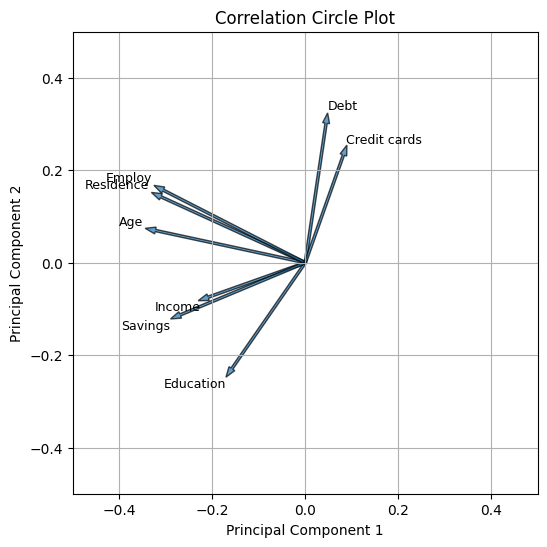

In [17]:
loadings = top_components * np.sqrt(explained_variance[:3])

plt.figure(figsize=(6, 6))
plt.title('Correlation Circle Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.grid(True)

## Draw arrows and label them
for i, feature in enumerate(df.columns):
    x, y = loadings[i, 0], loadings[i, 1]

    ## the arrows
    plt.arrow(0, 0, x, y, alpha=0.7, width=0.005)

    ## place the label slightly beyond the arrow tip so it doesn't overlap
    label_x, label_y = x * 1.08, y * 1.08
    ## horizontal and vertical alignment for label readability
    ha = 'left' if label_x >= 0 else 'right'
    va = 'bottom' if label_y >= 0 else 'top'

    plt.text(label_x, label_y, feature, fontsize=9, ha=ha, va=va)

plt.show()

<h2> Conclusions from the graphic</h2>

### What each Principal Component represents:
**Principal Component 1**
 - Debt and Credit cards positively correlate with PC1;
 - Employ, Residence, Age, Income, Savings, Education correlate negatively PC1;
 - This component represents Financial Stability vs. Credit Card Usage;
 - High values of PC1 indicate the individual has more debt and credit cards;
 - Low values of PC1 indicate the individual is employed, has a residence, is older, has better income, more savings and education.

**Principal Component 2**
 - Employment, Residence, Debt and Credit Cards positively correlate with PC2;
 - Income, Savings and Education negatively correlate with PC2
 - This component represents Young High Education and Income vs. Established People with Debt;
 - High values of PC2 indicate the individual has more debt and credit cards;
 - Low values of PC2 indicatee the individual has more education & savings.

---

### Positive Correlations
There are **three groups of variables that positively correlate**, meaning they tend to increase or decrease together:

- **Age, Residence, Employment**  
  Older individuals who have lived longer in the same residence tend to have more stable employment.

- **Income, Savings**  
  Higher income levels are associated with larger savings, suggesting financial stability.

- **Debt, Credit Cards**  
  Individuals with more debt tend to hold more credit cards, indicating a pattern of higher credit usage.

---

### Weak or No Correlation
These variables show **little to no relationship**, meaning knowing one does not help predict the other:

- **Education** vs. **Age, Residence, Employment**  
  The level of education does not appear strongly related to a person’s age, residential stability, or employment status.

- **Debt and Credit Cards** vs. **Age, Residence, Employment**  
  Credit usage and debt levels do not show a strong link to age or job stability.

---

### Negative Correlations
These variables tend to move in **opposite directions**:

- **Education** vs. **Debt and Credit Cards**  
  Individuals with higher education levels tend to have less debt and fewer credit cards, suggesting more controlled financial behavior.

---
### Interesting Correlations
- The demographic variables (age, residency, family) appear somewhat correlated and load more on PC2
- Education appears negatively correlated with PC2, suggesting it may have an inverse relationship with some demographic factors
- Income and savings being near the origin suggests they don't strongly define either principal component, though they're close to each other
---

# 2. Heatmap of the correlation matrix

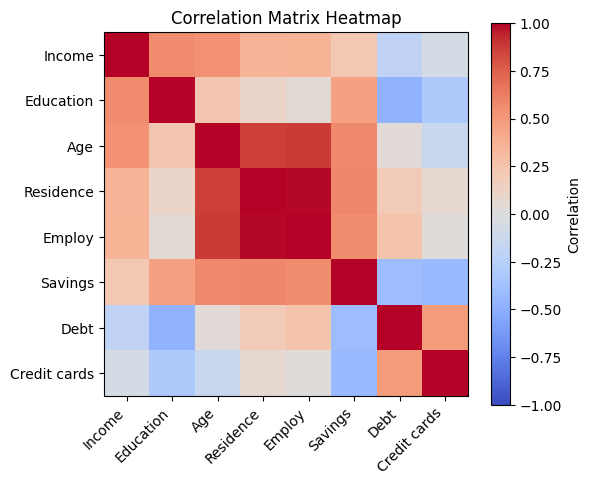

In [18]:
plt.figure(figsize=(6, 5))
plt.imshow(Cov, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label="Correlation")

plt.xticks(range(len(df.columns)), df.columns, rotation=45, ha='right')
plt.yticks(range(len(df.columns)), df.columns)

plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

## Correlation Matrix Analysis

### Strong Positive Correlations:
- **Age, Residence, and Employment** form a tight cluster with strong intercorrelations (dark red). This suggests these variables move together—older individuals tend to have longer residence duration and more stable employment.
- **Debt and Credit cards** show a strong positive correlation, indicating people with higher debt tend to have more credit card usage (or balances).
- **Income and Education** are moderately correlated, which aligns with expectations that higher education often leads to higher income.

### Negative Correlations:
- **Debt and Income** show a negative relationship (blue), suggesting higher earners tend to have less debt relative to other factors.
- **Credit cards and Income/Education** also show negative correlations, which is interesting—it might indicate that higher earners use credit cards differently or carry lower balances.

### Weak Correlations:
- **Savings** shows relatively weak correlations with most variables except a moderate positive relationship with employ/residence.
- **Education and Employ/Residence** show a weak correlation, suggesting education level is probably independent of employment status and residence.

# 3. How I found PC3 meaning: 
<h2>Top 3 positive and negative values for PC3</h2>

In [32]:
## Higher positive values
top_positive = np.argsort(dataPca[:, 2])[-3:][::-1]
print(f"\nMais altos (positivos):")
for idx in top_positive:
    print(f"Pessoa {idx}: {dataPca[idx, 2]:.2f}")
    print(df.iloc[idx])
    print()

## Lower negative values
top_negative = np.argsort(dataPca[:, 2])[:3]
print(f"Mais baixos (negativos):")
for idx in top_negative:
    print(f"Pessoa {idx}: {dataPca[idx, 2]:.2f}")
    print(df.iloc[idx])
    print()


Mais altos (positivos):
Pessoa 17: 1.91
Income          34600
Education          16
Age                40
Residence          14
Employ             12
Savings         34000
Debt              100
Credit cards        3
Name: 17, dtype: int64

Pessoa 14: 1.62
Income          38720
Education          16
Age                36
Residence          11
Employ             11
Savings         24500
Debt              540
Credit cards        2
Name: 14, dtype: int64

Pessoa 9: 1.37
Income          32000
Education          16
Age                30
Residence           2
Employ              2
Savings         16000
Debt              550
Credit cards        1
Name: 9, dtype: int64

Mais baixos (negativos):
Pessoa 3: -3.17
Income          88000
Education          20
Age                35
Residence           4
Employ              4
Savings           980
Debt             1100
Credit cards        4
Name: 3, dtype: int64

Pessoa 1: -1.51
Income          72000
Education          18
Age                35
Residen

# 4. Datapoints projected onto principal components

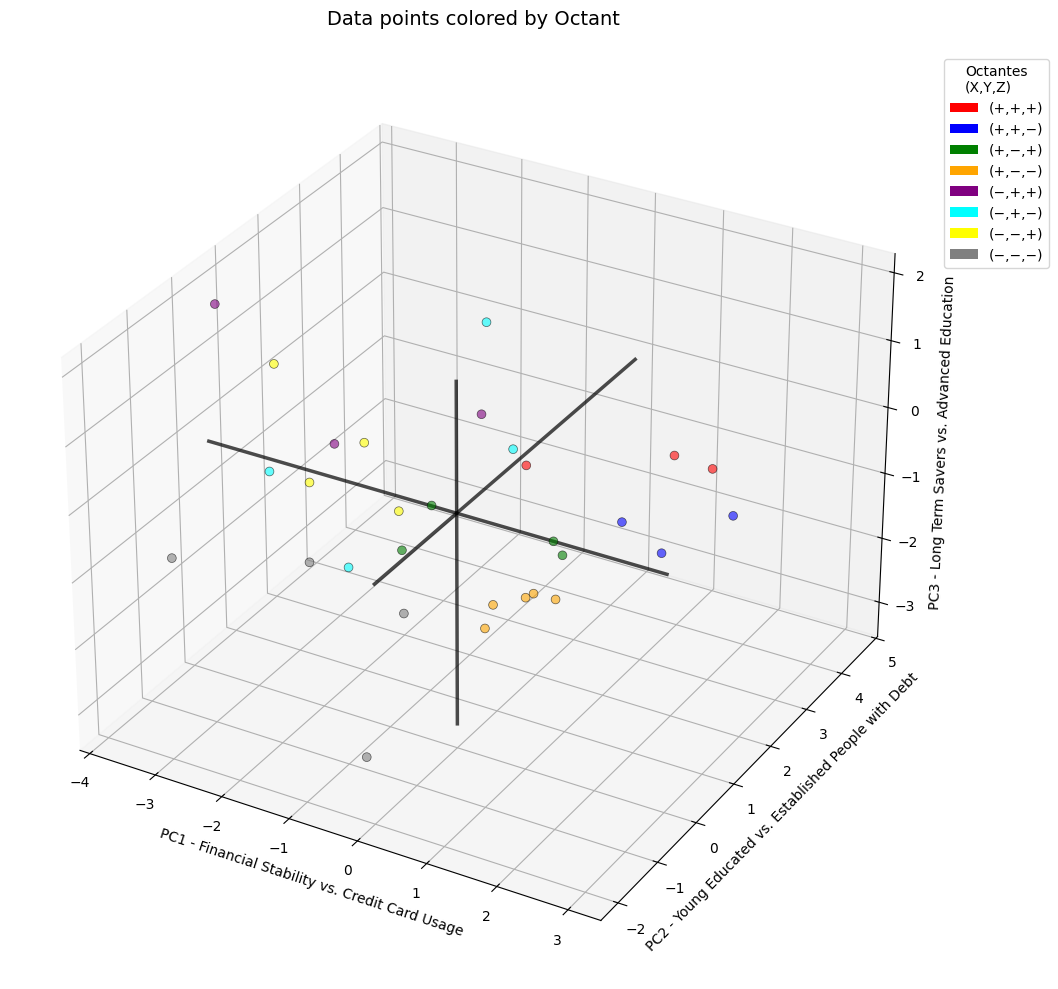


Octants distribution:
(+,+,+): 3 points (10.0%)
(+,+,−): 3 points (10.0%)
(+,−,+): 4 points (13.3%)
(+,−,−): 5 points (16.7%)
(−,+,+): 3 points (10.0%)
(−,+,−): 4 points (13.3%)
(−,−,+): 4 points (13.3%)
(−,−,−): 4 points (13.3%)


In [31]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(14,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('PC1 - Financial Stability vs. Credit Card Usage')
ax.set_ylabel('PC2 - Young Educated vs. Established People with Debt')
ax.set_zlabel('PC3 - Long Term Savers vs. Advanced Education')
ax.set_title('Data points colored by Octant', fontsize=14, pad=20)

## data for three dimensional scattered points
xdata = dataPca[:,0]
ydata = dataPca[:,1]
zdata = dataPca[:,2]

## classify each point based on octant
colors = []
labels = []

for i in range(len(xdata)):
    x_pos = xdata[i] >= 0
    y_pos = ydata[i] >= 0
    z_pos = zdata[i] >= 0
    
    ## assign color based on x,y,z position
    if x_pos and y_pos and z_pos:
        colors.append('red')
        label = '(+,+,+)'
    elif x_pos and y_pos and not z_pos:
        colors.append('blue')
        label = '(+,+,−)'
    elif x_pos and not y_pos and z_pos:
        colors.append('green')
        label = '(+,−,+)'
    elif x_pos and not y_pos and not z_pos:
        colors.append('orange')
        label = '(+,−,−)'
    elif not x_pos and y_pos and z_pos:
        colors.append('purple')
        label = '(−,+,+)'
    elif not x_pos and y_pos and not z_pos:
        colors.append('cyan')
        label = '(−,+,−)'
    elif not x_pos and not y_pos and z_pos:
        colors.append('yellow')
        label = '(−,−,+)'
    else:
        colors.append('gray')
        label = '(−,−,−)'
    
    labels.append(label)

## scatter plot based on colors
ax.scatter3D(xdata, ydata, zdata, c=colors, s=40, alpha=0.6, edgecolors='black', linewidth=0.5)

## get x,y,z limits to draw axis lines
x_range = [xdata.min(), xdata.max()]
y_range = [ydata.min(), ydata.max()]
z_range = [zdata.min(), zdata.max()]

## axis lines drawing
ax.plot([0, 0], [y_range[0], y_range[1]], [0, 0], 'k-', linewidth=2.5, alpha=0.7)
ax.plot([x_range[0], x_range[1]], [0, 0], [0, 0], 'k-', linewidth=2.5, alpha=0.7)
ax.plot([0, 0], [0, 0], [z_range[0], z_range[1]], 'k-', linewidth=2.5, alpha=0.7)

## labels
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', label='(+,+,+)'),
    Patch(facecolor='blue', label='(+,+,−)'),
    Patch(facecolor='green', label='(+,−,+)'),
    Patch(facecolor='orange', label='(+,−,−)'),
    Patch(facecolor='purple', label='(−,+,+)'),
    Patch(facecolor='cyan', label='(−,+,−)'),
    Patch(facecolor='yellow', label='(−,−,+)'),
    Patch(facecolor='gray', label='(−,−,−)')
]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.0, 1), 
          title='Octantes\n(X,Y,Z)', fontsize=10)

plt.tight_layout()
plt.show()

## statistics
unique_labels, counts = np.unique(labels, return_counts=True)
print("\nOctants distribution:")
for label, count in zip(unique_labels, counts):
    print(f"{label}: {count} points ({count/len(labels)*100:.1f}%)")

**Octants distribution reading:**
- (+,+,+) 10%: "Leveraged Professionals"
  - **Reading:** High credit card usage + Established debtors + Advanced education
  - **Typical person:** Mid career individuals with good jobs, not afraid of debt, they use cards on purpose and know what they’re doing
- (+,+,−) 10%: "Credit Dependent Savers"
  - **Reading:** High credit card usage + Established debtors + Long-term savers
  - **Typical person:** Usually older, paying their debt while still adding to retirement accounts
- (+,−,+) 13.3%: "Educated Credit Builders"
  - **Reading:** High credit card usage + Young educated + Advanced education
  - **Typical person:** Fresh grads with master’s or doctorates, just starting to build a real credit file (often still have student loans)
- (+,−,−) 16.7%: "Young Disciplined Spenders" - **Largest group**
  - **Reading:** High credit card usage + Young educated + Long-term savers
  - **Typical person:** Younger professionals who use credit cards for points or convenience yet keep saving money.
- (−,+,+) 10%: "Stable Established Scholars"
  - **Reading:** Financially stable + Established debtors + Advanced education
  - **Typical person:** Professionals who’ve paid off almost everything, highly educated, barely or don't use credit.
- (−,+,−) 13.3%: "Conservative Planners"
  - **Reading:** Financially stable + Established debtors + Long-term savers
  - **Typical person:** Older individuals close to having the house paid off, more worried about retirement than borrowing
- (−,−,+) 13.3%: "Privileged Graduates"
  - **Reading:** Financially stable + Young educated + Advanced education
  - **Typical person:** Kids who came out of school debt-free (family money, scholarships) and started adult life without much to worry about.
- (−,−,−) 13.3%: "Frugal Beginners"
  - **Reading:** Financially stable + Young educated + Long-term savers
  - **Typical person:** Young and educated people who live cheap, hardly use credit, and save.
    

### Conclusions:
- Higher values have low income, low debt, good amount of time in their job and residence, high savings.
- Lower values have very high income and education, more debt than higher values.
- Given these conclusions, PC3 represents: Long-term savers vs. Advanced Education

# Final Analysis of the Dataset
The population splits 50/50 between people who use credit cards a lot and people who barely touch them. Young professionals make up 43% of everyone, and they're all over the map financially. The biggest group (17%) are young people who rack up credit card charges but also save money, so using cards doesn't mean you're broke. Education doesn't matter much for predicting who uses credit. People tend to borrow when they're younger and pay things off as they age. Nobody here is actually struggling, everyone's either educated, saving, or stable. Just two different camps: people who see debt as a useful tool versus people who avoid it entirely.

# Bibliography
- https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
- https://en.wikipedia.org/wiki/Principal_component_analysis 
- https://medium.com/@sahin.samia/principal-component-analysis-pca-made-easy-a-complete-hands-on-guide-e26a3680c0bc